<a href="https://colab.research.google.com/github/YusufAbdurrahmann/weather-predict/blob/main/weather_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("sample_data/seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# **Data Understanding**

In [29]:
print(df.shape)

(1461, 6)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


# **Data Cleaning**

In [31]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [32]:
df.duplicated().sum()

0

# **Explanatory Data Analysist (EDA)**

<ipython-input-76-8ed364fd45ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weather", data=df, palette="pastel")


Text(0, 0.5, 'Frekuensi')

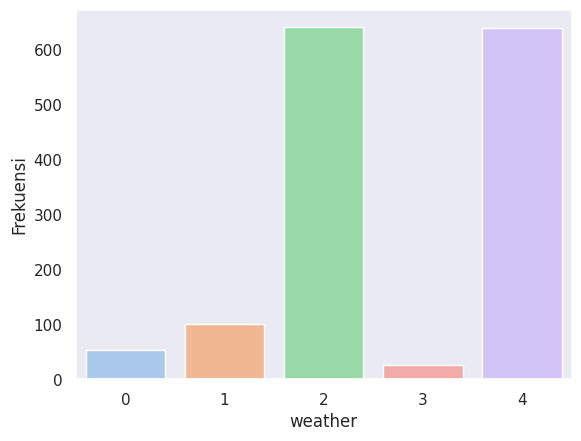

In [76]:
sns.set_theme(style="dark")
sns.countplot(x="weather", data=df, palette="pastel")
plt.ylabel("Frekuensi")

In [77]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,1456,8.6,4.4,1.7,2.9,2
1457,1457,1.5,5.0,1.7,1.3,2
1458,1458,0.0,7.2,0.6,2.6,1
1459,1459,0.0,5.6,-1.0,3.4,4


In [78]:
wt = LabelEncoder()
dt = LabelEncoder()

df["weather"] = wt.fit_transform(df["weather"])
df["date"] = dt.fit_transform(df["date"])

In [79]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,1456,8.6,4.4,1.7,2.9,2
1457,1457,1.5,5.0,1.7,1.3,2
1458,1458,0.0,7.2,0.6,2.6,1
1459,1459,0.0,5.6,-1.0,3.4,4


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   int64  
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 68.6 KB


# **Data Preperaton**

In [133]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [134]:
X = df.drop(columns = ["weather"])
y = df["weather"]

print("x = ", X.shape)
print("x = ", y.shape)

x =  (1461, 5)
x =  (1461,)


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [136]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,1456,8.6,4.4,1.7,2.9,2
1457,1457,1.5,5.0,1.7,1.3,2
1458,1458,0.0,7.2,0.6,2.6,1
1459,1459,0.0,5.6,-1.0,3.4,4


# **Modelling**

In [139]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(classification_report(y_pred,y_test))
print(accuracy)
print("Akurasi : {:.2f} %".format(accuracy*100))

              precision    recall  f1-score   support

           0       0.11      0.33      0.17         3
           1       0.36      0.47      0.41        19
           2       0.78      0.69      0.73       137
           3       0.12      1.00      0.22         1
           4       0.75      0.74      0.74       133

    accuracy                           0.69       293
   macro avg       0.43      0.65      0.45       293
weighted avg       0.73      0.69      0.71       293

0.6928327645051194
Akurasi : 69.28 %
